# Capital Bikeshare Ride Prediction: Data Wrangling

**Author**: Matthew Cassi
<br>
**Date**: September 25, 2017

## I. Project Description
The Capital Bikeshare Prediction project will involve predicting how long a ride will take between two Bikeshare locations in Washington D.C.. This analysis will take into account the day of the week, weather, and whether the ride falls on a holiday or not. 
## II. Datasets
The data for the prediction comes from two different sources: UCI Machine Learning Repository for the weather data and the Capital Bikeshare website for the time and start/end point data. The data will need to be joined together to perform the analysis needed for prediction. The UCI dataset contains dates and weather information (wind, temperature, humidity, number of bikes per day) for each day between January 2011 and December 2012. The bikeshare dataset contains start times, end time, start locations, end locations, and member type from the first quarter of 2011 (January through March). 
## III. Loading and Cleaning the Datasets
Both datasets contain date columns that needed to be loaded in as datetime objects to make it easier for filtering and merging of the datasets. In the code below, both read_csv functions use the parse_dates attributes to ensure the date columns date columns in Python.
<br>
<br>
When inspecting the first few rows of each dataframe, both datasets have columns that are not necessary for the analysis and prediction aspects of the project. The UCI weather dataset contains extra columns like month, year, and instant (an index column). The bikeshare dataset contains additional columns like duration (text field) and bike serial number. All of these columns were removed as they would not impact the analysis to be performed.
<br>
<br>
There were not many missing values in each dataset. The bikeshare data contained 11 rows that did not have a final end point. These rows were removed from the bikeshare dataset. The UCI data did not have any null or missing values.
<br>
<br>
Prior to joining the two datasets together, the date columns from both datasets needed to be in the same format. The UCI weather dataset date format is YYYY-MM-DD, while the Bikeshare data uses a YYYY-MM-DD HH:MM:SS format. Two additional columns were created in the Bikeshare data with the YYYY-MM-DD format. The original columns with the hours, minutes, and seconds were kept. In addition to creating those two columns, another columns was created for the time difference, in minutes, between the start and end times of the bikeshare dataset.
## IV. Joining the Datasets
The two datasets needed to be joined to have a complete dataset needed for prediction purposes. The datasets were left joined with the bikeshare data as the left dataset and the UCI data as the right dataset. This was done so that all of the values from the bikeshare dataset remained in the dataset and only the dates that matched from the UCI dataset were included. After cleaning and merging the datasets, there were 150,000 rows.
## V. Outliers
After cleaning and joining the datasets together, the data was inspected for outliers. The main column to check was the duration column of the data. The duration column contained many values that were very large with the max being well over 5000 minutes. 

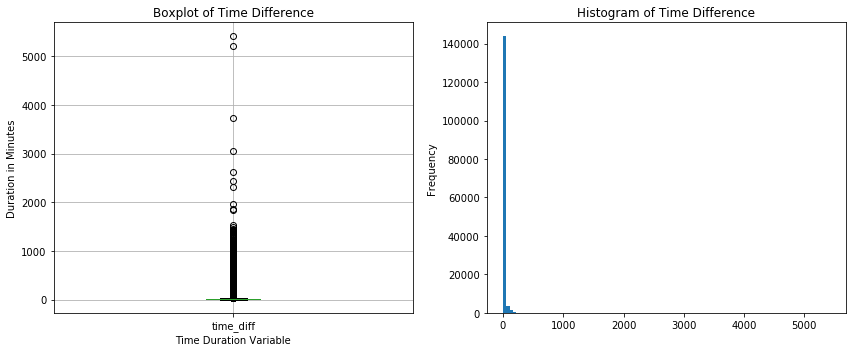

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline

weather = pd.read_csv('day.csv', parse_dates=['dteday'])
bike_share = pd.read_csv('2011-Q1-cabi-trip-history-data.csv', parse_dates=['Start date', 'End date'])

bike_share.drop('Duration', 1, inplace=True)
bike_share.drop('Bike#', 1, inplace=True)
bike_share['start_date_short'] = pd.to_datetime(bike_share['Start date'].dt.strftime('%Y-%m-%d'))
bike_share['end_date_short'] = pd.to_datetime(bike_share['End date'].dt.strftime('%Y-%m-%d'))
bike_share['time_diff'] = bike_share['End date'] - bike_share['Start date']
bike_share['time_diff'] = bike_share['time_diff'].astype('timedelta64[m]')

weather.drop('instant', 1, inplace=True)
weather.drop('yr', 1, inplace=True)
weather.drop('casual', 1, inplace=True)
weather.drop('registered', 1, inplace=True)
weather.drop('cnt', 1, inplace=True)

merged_data = pd.merge(bike_share, weather, how='left', left_on='start_date_short', right_on='dteday')
merged_data.drop('dteday', 1, inplace=True)
merged_data.dropna(inplace=True)

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
merged_data.boxplot('time_diff')
plt.title('Boxplot of Time Difference')
plt.ylabel('Duration in Minutes')
plt.xlabel('Time Duration Variable')
plt.subplot(1,2,2)
merged_data['time_diff'].plot.hist(bins=100)
plt.title('Histogram of Time Difference')
plt.tight_layout()
plt.show()

The box plot above shows the time difference column and the shape of the distribution of the column is difficult to discern. The shape of the distribution cannot be determined because the values of the time difference are so spread out. The box of the box plot cannot be displayed because of these outliers. These outliers would have to be removed in order to show the distribution of the data.
<br>
<br>
Outliers were removed by using the formula Q3 + (1.5 * IQR) where IQR is the interquartile range (75th quartile minus the 25th quartile) and Q3 is the 75th quartile. The IQR for the time difference column is 10 and Q3 is 16 so an outlier is defined as any value greater than 31.

In [28]:
smaller_data = merged_data.copy()
smaller_data = smaller_data[smaller_data['time_diff'] < 32]

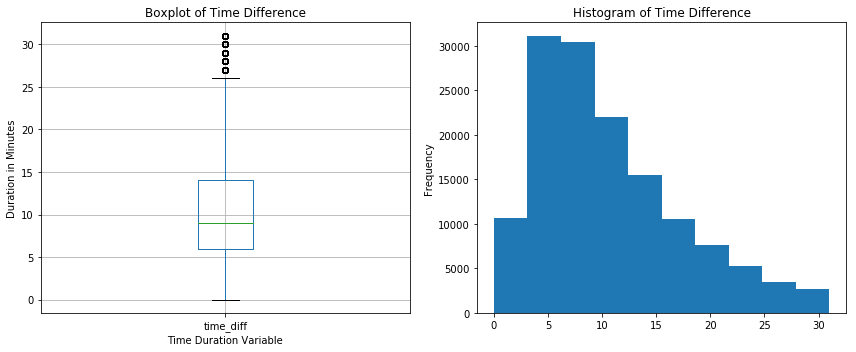

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
smaller_data.boxplot('time_diff')
plt.title('Boxplot of Time Difference')
plt.ylabel('Duration in Minutes')
plt.xlabel('Time Duration Variable')
plt.subplot(1,2,2)
smaller_data['time_diff'].plot.hist()
plt.title('Histogram of Time Difference')
plt.tight_layout()
plt.show()

After removing the outliers of this dataset, the box of the box plot became visible and the distribution of the time difference looked like it was right skewed. After removing the outliers, there were more than 139,000 rows in the overall dataset.